## Step 0: Imports and Reading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sns
import ast

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("10000 Movies Data.csv")

## Step 0.1: Design the Charts


#### General Chart Design

In [ ]:
def chart_styling(ax, fig, title, bars, logo_path='logo.png'):
    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09, 1.05, title, fontsize=18, fontweight='bold', fontfamily='serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([0.85, 0.85, 0.1, 0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis='y', linestyle='-', alpha=0.2)
    ax.set_axisbelow(True)

    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis='both', which='major', labelsize=12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])

    for bar in bars:
        bar.set_color('#008080') 
        
    for bar in bars:
        bar.set_edgecolor('#000000')
        bar.set_linewidth(0.5)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Pie Charts Design

In [ ]:
def pie_chart_styling(values, labels, title, figsize=(18, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    
    total = sum(values)
    percentages = [v/total*100 for v in values]
    
    wedges, texts, autotexts = ax.pie(values,
                                     labels=labels,
                                     autopct='%1.1f%%',
                                     startangle=140,
                                     colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    
    fig.patch.set_facecolor('#f0f0f0')
    ax.set_facecolor('#f0f0f0')
    
    fig.text(0.5, 0.95, title, ha='center', fontsize=18, fontweight='bold', fontfamily='serif')
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')
    
    ax.legend([f'{l} ({p:.1f}%)' for l, p in zip(labels, percentages)], 
             loc='center left', 
             bbox_to_anchor=(1, 0.5), 
             fontsize=12)
    
    plt.show()

## Step 1: Data Understanding

In [ ]:
df.head(5)

In [ ]:
print(df.shape[0])
print(df.shape[1])

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
missingData = df.isnull().sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(18, 10))

bars = ax.bar(missingData.index, missingData.values)

chart_styling(fig= fig, ax = ax, bars= bars, title = "Missing Values")

plt.show()

In [ ]:
for column in df.columns:
    print(f"{column} : {len(df[column].unique())}")

## Step 2: Data Preperation

#### Fix The Genres Datatypes and Names

In [ ]:
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [g['name'] for g in genres]
    except:
        return []

dataFrame = df[['index', 'title', 'Genres', 'release_date', 'Budget', 'Revenue', 'popularity', 'vote_average', 'vote_count']].copy()
dataFrame['Genres'] = dataFrame['Genres'].apply(extract_genres)

In [ ]:
dfGenreExploded = dataFrame.explode('genres')

#### Create A New Dataframe From The Values That I Want To Use

In [ ]:
dataFrame.rename(columns={
    'index': 'id',
    'title': 'title',
    'Genres': 'genres',
    'release_date': 'releaseDate',
    'Budget': 'budget',
    'Revenue': 'revenue',
    'popularity': 'popularity',
    'vote_average': 'rating',
    'vote_count': 'votes'
}, inplace=True)

#### Fix The Inappropriate Data Types

In [ ]:
dataFrame['releaseDate'] = pd.to_datetime(dataFrame['releaseDate'])

## Step 3: Feature Understanding

In [85]:
dataFrame.head(5)

,id,title,genres,releaseDate,budget,revenue,popularity,rating,votes
0,0,The Godfather,"[Drama, Crime]",1972-03-14,245066411,245066411,93.552,8.7,16814
1,1,The Shawshank Redemption,"[Drama, Crime]",1994-09-23,28341469,28341469,78.664,8.7,22542
2,2,The Godfather Part II,"[Drama, Crime]",1974-12-20,102600000,102600000,55.752,8.6,10187
3,3,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",1995-10-19,100000000,100000000,22.150,8.6,3927
4,4,Schindler's List,"[Drama, History, War]",1993-12-15,321365567,321365567,53.542,8.6,13382


#### Count of Movies By Genres

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))

m = dfGenreExploded['genres'].values
n = dfGenreExploded['genres'].index


bars = sns.barplot(x= m, y= n)

chart_styling(ax=ax, fig=fig, title="Count of Movies By Genres", bars=bars.patches)

plt.show()

#### Distribution of Ratings

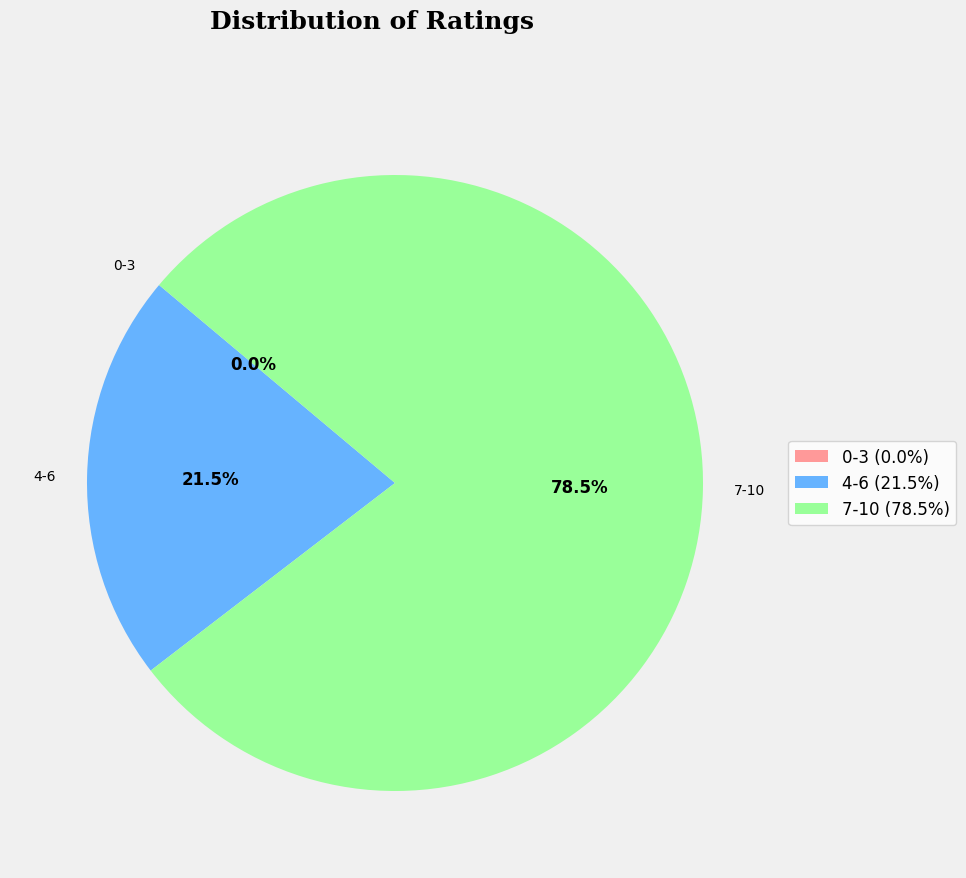

In [91]:
ratingZeroToThree = dataFrame.query('rating >= 0 and rating <= 3').index
ratingFourToSix = dataFrame.query('rating > 3 and rating <= 6').index
ratingSevenToTen = dataFrame.query('rating > 6 and rating <= 10').index

values = [len(ratingZeroToThree), len(ratingFourToSix), len(ratingSevenToTen)]
labels = ['0-3', '4-6', '7-10']

pie_chart_styling(values=values, labels=labels, title="Distribution of Ratings")

plt.show()